In [3]:
# Question 1b. Code to build a Naive Bayes and KNN Classifier.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/Users/yashsoni/Documents/hamspam.csv.csv')

# Encode categorical features
label_enc = LabelEncoder()
for col in ['Contains Link', 'Contains Money Words', 'Length', 'Class']:
    df[col] = label_enc.fit_transform(df[col])

# Define features and target
X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Train K-Nearest Neighbors classifier (K=2)
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Evaluate models
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))


Naive Bayes Accuracy: 0.535
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.83      0.65       103
           1       0.55      0.23      0.32        97

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.48       200
weighted avg       0.54      0.54      0.49       200

KNN Accuracy: 0.525
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.85      0.65       103
           1       0.53      0.18      0.26        97

    accuracy                           0.53       200
   macro avg       0.53      0.51      0.46       200
weighted avg       0.53      0.53      0.46       200



   Threshold       TPR       FPR
0       0.95  0.541667  0.051282
1       0.90  0.638889  0.064103
2       0.85  0.708333  0.064103
3       0.80  0.750000  0.064103
4       0.75  0.763889  0.076923
5       0.70  0.805556  0.076923


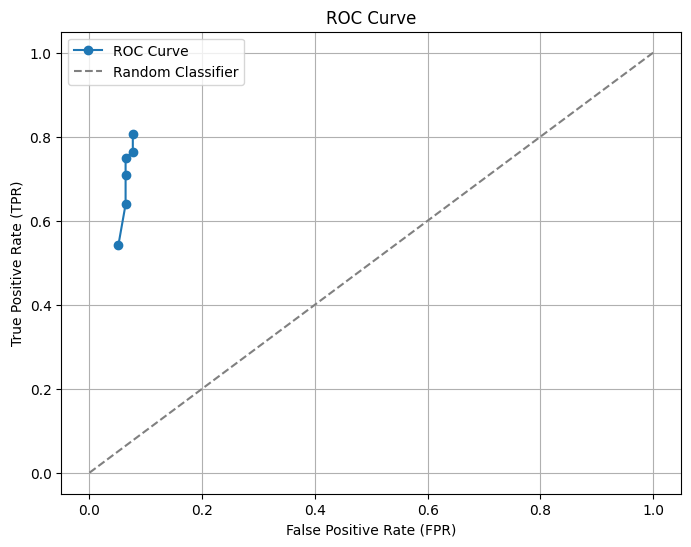

In [4]:
# 2a: Step 1 and 3: Create a ROC and TPR, FPR.
import matplotlib.pyplot as plt

# Load the ROC data
roc_data = pd.read_csv('/Users/yashsoni/Documents/roc_data.csv')

# Define threshold values
thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

# Initialize lists to store computed values
tpr_list = []
fpr_list = []

# Compute TP, FP, TPR, and FPR for each threshold
for threshold in thresholds:
    # Predictions at the given threshold
    roc_data["Predicted_Label"] = (roc_data["Prediction"] >= threshold).astype(int)
    
    # Compute True Positives, False Positives, False Negatives, True Negatives
    TP = ((roc_data["Predicted_Label"] == 1) & (roc_data["True_Label"] == 1)).sum()
    FP = ((roc_data["Predicted_Label"] == 1) & (roc_data["True_Label"] == 0)).sum()
    FN = ((roc_data["Predicted_Label"] == 0) & (roc_data["True_Label"] == 1)).sum()
    TN = ((roc_data["Predicted_Label"] == 0) & (roc_data["True_Label"] == 0)).sum()

    # Compute True Positive Rate (TPR) and False Positive Rate (FPR)
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

    # Store the values
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Create a DataFrame for visualization
roc_df = pd.DataFrame({"Threshold": thresholds, "TPR": tpr_list, "FPR": fpr_list})

# Display computed values
print(roc_df)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


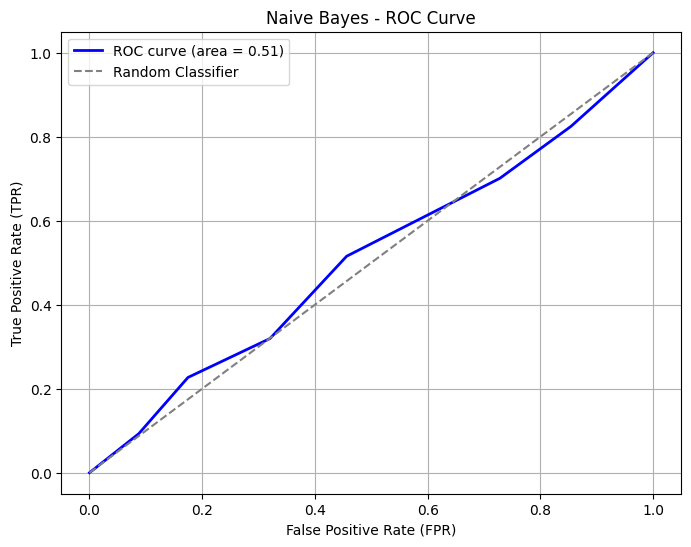

AUC Score: 0.51


In [5]:
# 2b. ROC curve and AUC using Naive Bayes Classifier.
from sklearn.metrics import roc_curve, auc

# Load dataset
df = pd.read_csv('/Users/yashsoni/Documents/hamspam.csv.csv')

# Encode categorical features
label_enc = LabelEncoder()
for col in ['Contains Link', 'Contains Money Words', 'Length', 'Class']:
    df[col] = label_enc.fit_transform(df[col])

# Define features and target
X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict probabilities
y_scores = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Naive Bayes - ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f"AUC Score: {roc_auc:.2f}")
